In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
train_df=pd.read_csv("D:\\machine learning projecsts folders\\realstate\\missing imputation\\gurgaon_properties_value_imputation")

In [4]:
train_df.sample(4)

,property_type,sector,price,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score
2979,Flat,sector 108,0.70,2.0,2.0,1,10.0,Moderately Old,1468.0,0,0,0,0,0,0,0
87,Flat,sohna road,0.20,2.0,2.0,1,4.0,New Property,743.0,0,0,0,0,0,0,15
1501,Flat,sector 95,0.45,2.0,2.0,2,19.0,New Property,695.0,0,0,0,0,0,0,0
2083,House,sector 9,0.35,2.0,2.0,1,2.0,Old Property,360.0,0,0,0,0,0,0,0


# luxury_score

<Axes: xlabel='luxury_score', ylabel='Count'>

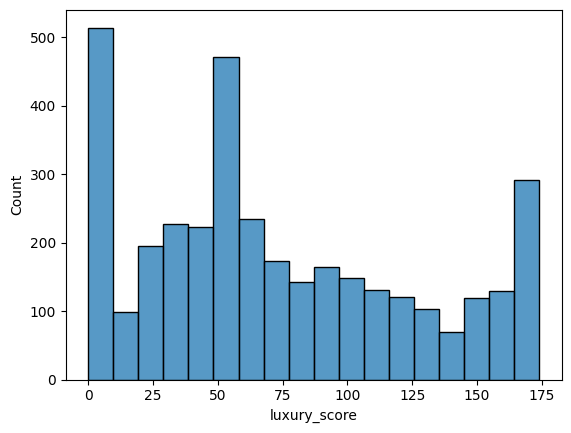

In [5]:
sns.histplot(train_df['luxury_score'])

In [6]:
train_df['luxury_score'].describe()

count    3555.000000
mean       72.440788
std        53.097341
min         0.000000
25%        34.000000
50%        60.000000
75%       111.000000
max       174.000000
Name: luxury_score, dtype: float64

changing the luxury score into catogorical column with the name of low ,meddium,high


In [7]:
def change_luxury_score(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bin

In [8]:
train_df['luxury_cat']=train_df['luxury_score'].apply(change_luxury_score)

In [9]:
train_df.sample()

,property_type,sector,price,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,luxury_cat
3250,Flat,sohna road,0.93,2.0,2.0,2,9.0,Under Construction,1000.0,1,0,0,0,0,0,31,Low


change the floor number into cat columns 


<Axes: ylabel='Frequency'>

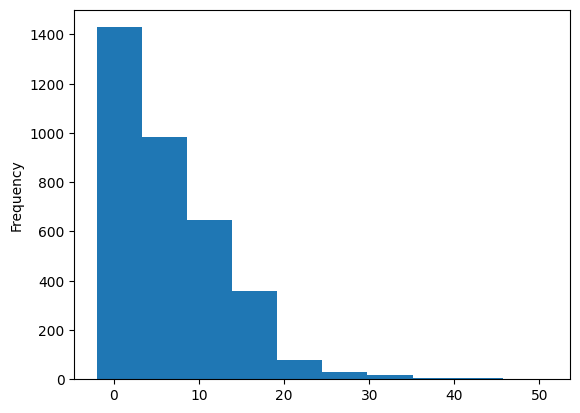

In [10]:
train_df['noOfFloor'].plot(kind='hist')

In [11]:
def change_floor(row):
    if 0<=row<5:
        return 'lower'
    elif 5<=row<15:
        return "mid"
    elif 15<=row<51:
        return 'high'
    else:
        return None
        

In [12]:
train_df['floor catt']=train_df['noOfFloor'].apply(change_floor)

In [13]:
train_df.sample(4)[['noOfFloor','floor catt']]

,noOfFloor,floor catt
1487,6.0,mid
1571,19.0,high
2183,13.0,mid
1230,7.0,mid


In [14]:
train_df.sample(4)

,property_type,sector,price,bedRoom,bathroom,balcony,noOfFloor,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_score,luxury_cat,floor catt
604,House,sector 26,6.75,3.0,3.0,3,2.0,Moderately Old,2430.0,0,0,0,0,0,0,27,Low,lower
2845,Flat,sector 53,6.50,4.0,5.0,3+,10.0,Relatively New,3000.0,0,1,1,0,1,2,174,High,mid
1027,Flat,sector 111,0.96,2.0,2.0,1,4.0,Under Construction,1337.0,0,0,0,0,1,0,53,Medium,lower
2000,House,sector 12,1.70,1.0,1.0,2,1.0,Old Property,2000.0,0,0,0,0,0,0,0,Low,lower


droping these features as we dont want the user to say that they want 34 floor and soo on a. and also removing luxury score as it does not want the user to guess the luxury score thats why we  created a new columns with the cat columns and droping the rest 

In [15]:
train_df.drop(columns=['noOfFloor','luxury_score'],inplace=True)

In [16]:
train_df.sample()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,others,pooja room,servant room,store room,study room,furnishing_type,luxury_cat,floor catt
3150,Flat,sector 85,1.14,2.0,2.0,3,Relatively New,1603.0,0,0,0,0,0,0,Low,high


In [17]:
from sklearn.preprocessing import OrdinalEncoder
data_label_encoded = train_df.copy()
categorical_cols = train_df.select_dtypes(include=['object']).columns
# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['Flat', 'House'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect